In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

file_name = "/home/carmen/Escritorio/TFM/ml_anonymization/datasets/bank_dataset/csv/bank-additional-full_raw.csv"
df= pd.read_csv(file_name, sep=";")

In [3]:
df["job"] = df["job"].astype("category").cat.codes
df["marital"] = df["marital"].astype("category").cat.codes
df["education"] = df["education"].astype("category").cat.codes
df["default"] = df["default"].astype("category").cat.codes
df["housing"] = df["housing"].astype("category").cat.codes
df["loan"] = df["loan"].astype("category").cat.codes
df["contact"] = df["contact"].astype("category").cat.codes
df["month"] = df["month"].astype("category").cat.codes
df["day_of_week"] = df["day_of_week"].astype("category").cat.codes
df["y"] = df["y"].astype("category").cat.codes

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Target variable distribution plot

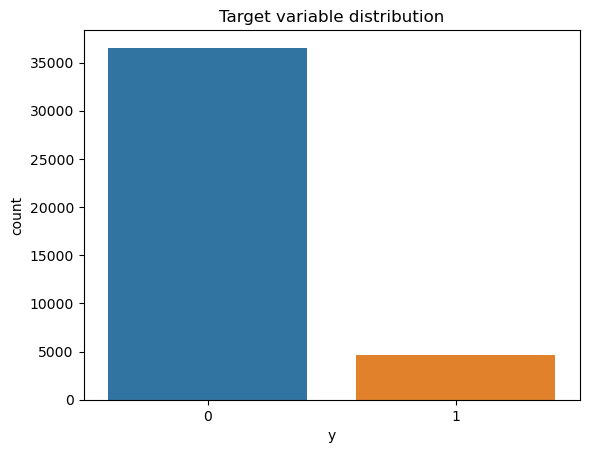

In [5]:
sns.countplot(x='y', data=df)
plt.title('Target variable distribution')
plt.show()


In [7]:
numeric_features=["job","marital","education","default","housing","loan","contact","month","day_of_week"]

### Numeric characteristics distribution plots

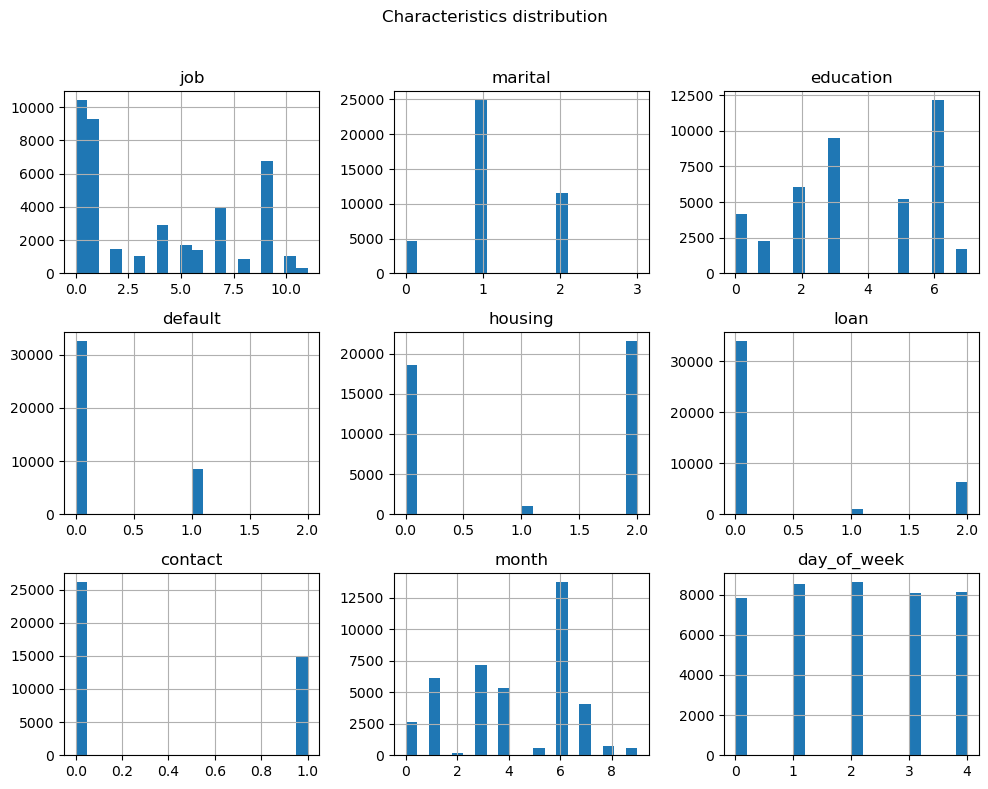

In [8]:
bank_numeric = df[numeric_features]
bank_numeric.hist(figsize=(10, 8), bins=20)
plt.suptitle('Characteristics distribution')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Correlation matrix of the main features

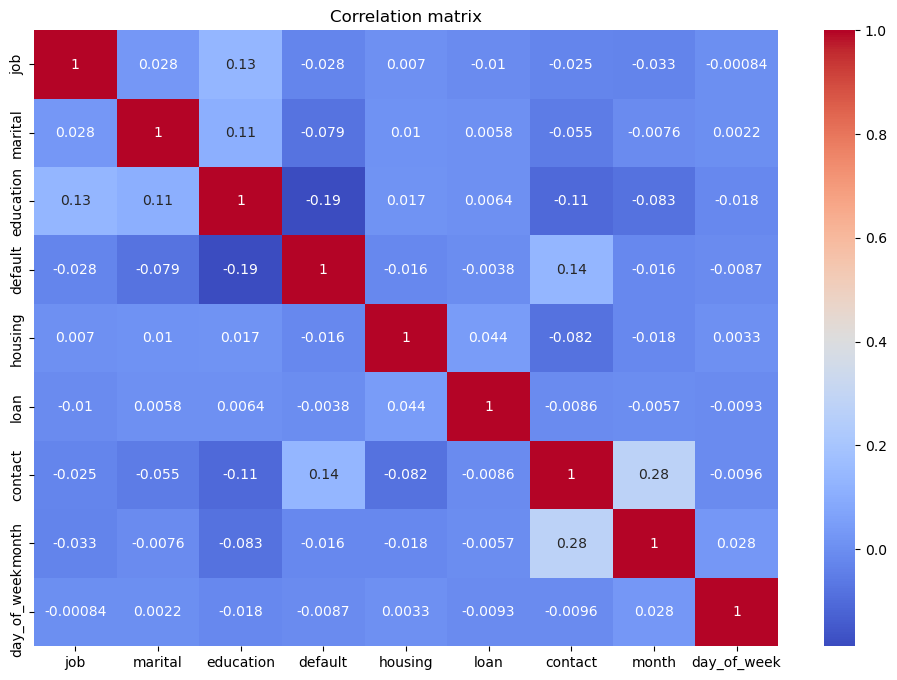

In [15]:
corr_matrix = bank_numeric.corr()

plt.figure(figsize=(12, 8))  # Size adjusting

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

###  Bar plot to show the characteristic distribution regarding the target variable

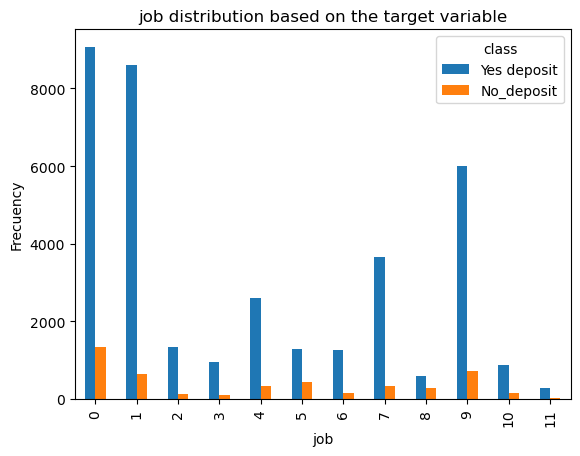

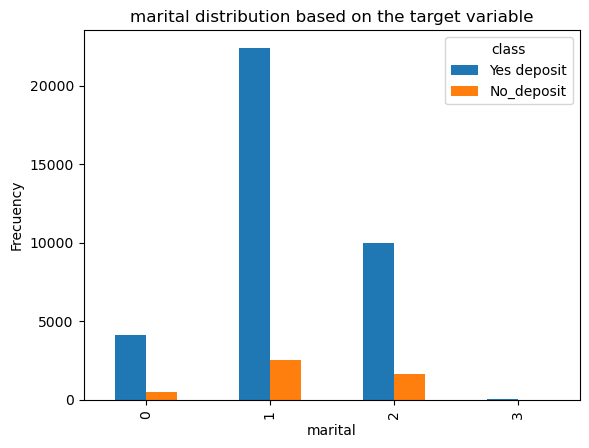

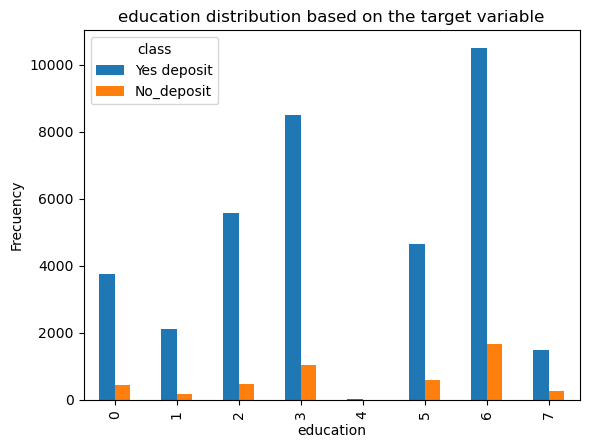

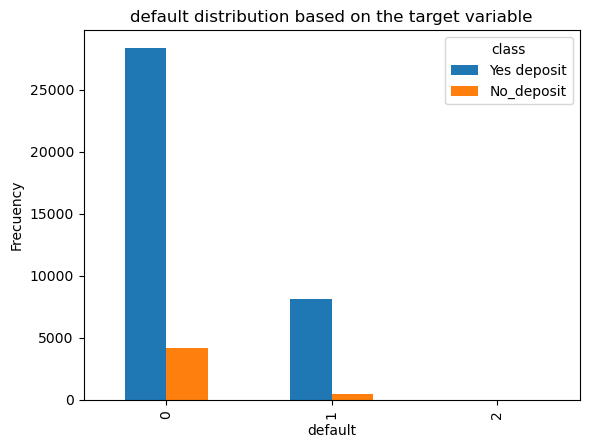

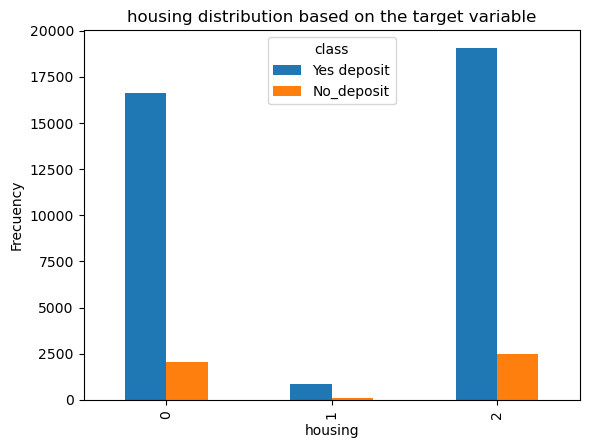

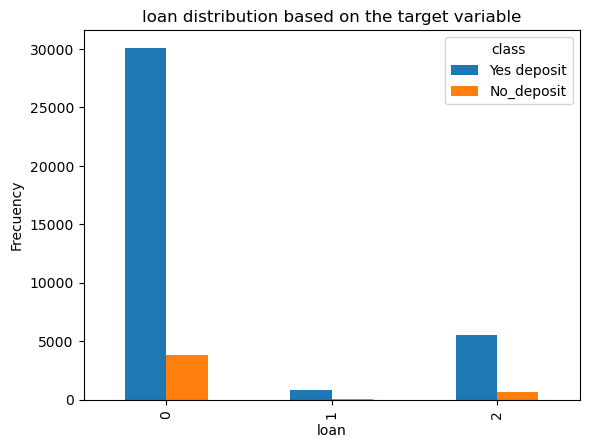

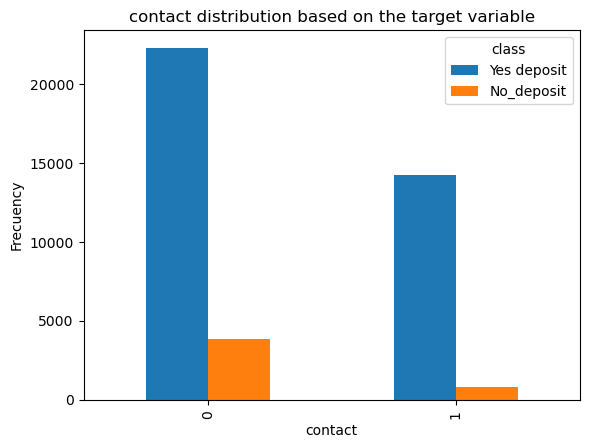

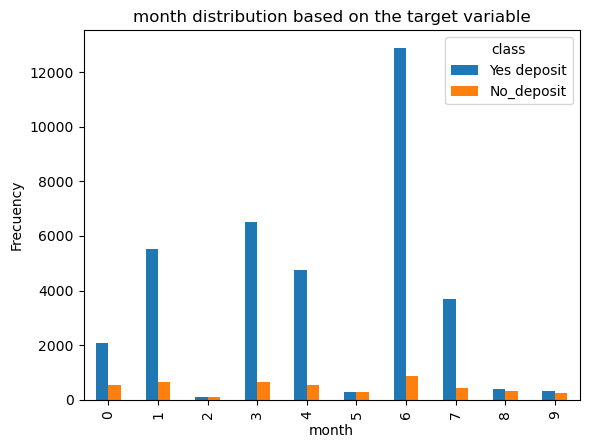

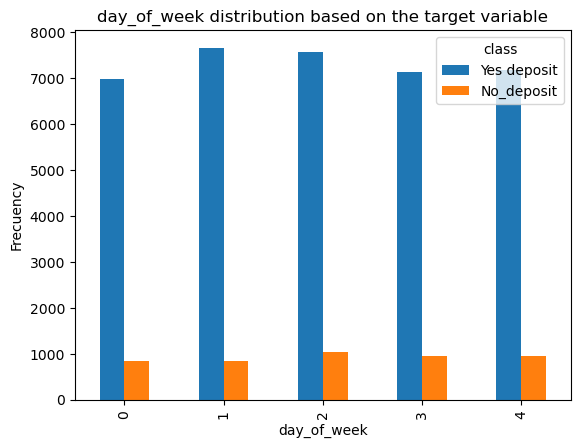

In [14]:
for feature in numeric_features:
    cross_tab = pd.crosstab(df[feature], df['y'])
    cross_tab.plot(kind='bar')
    plt.title(f'{feature} distribution based on the target variable')
    plt.xlabel(feature)
    plt.ylabel('Frecuency')
    plt.legend(title='class', labels=['Yes deposit', 'No_deposit'])
    plt.show()
